<a href="https://colab.research.google.com/github/jukamt/project_ai/blob/main/emotion_faceCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import keras
import tensorflow as tf
import pandas as pd
import glob as gb
import os
import matplotlib.pyplot as plt
from random import randint
from keras.callbacks import EarlyStopping
from random import randint
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization,  Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.linear_model import Perceptron
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/dataset_face/emtion/train',target_size=(150,150), batch_size=40, class_mode='categorical')

Found 140 images belonging to 7 classes.


In [ ]:
training_set.class_indices


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 64)      

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 50, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 23s 7s/step - loss: 124.1094 - accuracy: 0.1286
Epoch 2/50
4/4 [==============================] - 0s 84ms/step - loss: 49.9360 - accuracy: 0.1643
Epoch 3/50
4/4 [==============================] - 0s 73ms/step - loss: 26.4769 - accuracy: 0.1857
Epoch 4/50
4/4 [==============================] - 0s 106ms/step - loss: 10.4665 - accuracy: 0.1857
Epoch 5/50
4/4 [==============================] - 0s 104ms/step - loss: 3.9816 - accuracy: 0.3071
Epoch 6/50
4/4 [==============================] - 0s 104ms/step - loss: 2.2848 - accuracy: 0.3214
Epoch 7/50
4/4 [==============================] - 0s 111ms/step - loss: 4.7725 - accuracy: 0.2571
Epoch 8/50
4/4 [==============================] - 0s 84ms/step - loss: 2.8032 - accuracy: 0.3357
Epoch 9/50
4/4 [==============================] - 0s 83ms/step - loss: 1.8510 - accuracy: 0.4429
Epoch 10/50
4/4 [==============================] - 0s 96ms/step - loss: 0.9087 - accuracy: 0.7500
Epoch 11/50
4/4 [===============

In [ ]:
model.save('CNN_emotion.h5')


In [ ]:
from keras.models import load_model
CNN_emotion =load_model('CNN_emotion.h5')

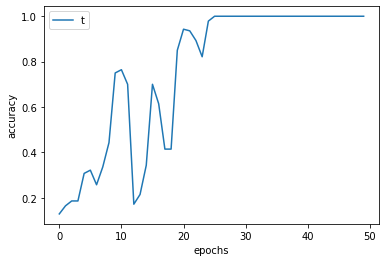

In [ ]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend('train')
plt.show()

1
sad


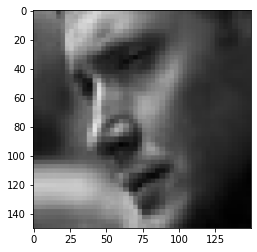

In [ ]:
img_path = '/content/drive/MyDrive/dataset_face/emtion/test/angry/PrivateTest_1054527.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
emotion=np.argmax(CNN_emotion.predict(img),axis=1)
pred = model.predict(img)
classes = ['angry','sad','happy','disgust','fear','neutral','surprise']
print(np.argmax(pred))
if emotion==0: print(classes[0])
elif emotion==1: print(classes[1])
elif emotion==2: print(classes[2])
elif emotion==3: print(classes[3])
elif emotion==4: print(classes[4])
elif emotion==5: print(classes[5])
elif emotion==6: print(classes[6])
elif emotion==7: print(classes[7])

4
fear


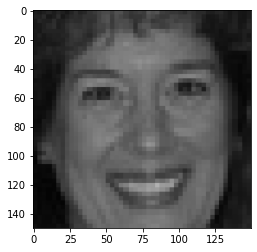

In [ ]:
img_path = '/content/drive/MyDrive/dataset_face/emtion/test/happy/PrivateTest_1735299.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
emotion=np.argmax(CNN_emotion.predict(img),axis=1)
pred = model.predict(img)
classes = ['angry','sad','happy','disgust','fear','neutral','surprise']
print(np.argmax(pred))
if emotion==0: print(classes[0])
elif emotion==1: print(classes[1])
elif emotion==2: print(classes[2])
elif emotion==3: print(classes[3])
elif emotion==4: print(classes[4])
elif emotion==5: print(classes[5])
elif emotion==6: print(classes[6])
elif emotion==7: print(classes[7])